In [1]:
import pandas as pd
import numpy as np
from utils import read_neutouch_adc
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
objs = ['cucumber', 'watermelon', 'tofu', 'dragonfruit']
iters = 15
data_dir = 'data/new_data'

def filter_taxels(sample, threshold=300):
    mask = (sample.adc > -100)
    for taxel in range(1,81):
        subsample = df[sample.taxel == taxel]
        if subsample.shape[0] > 0:
            if subsample.adc.iloc[0] >= threshold:
                mask &= ~(sample.taxel==taxel)
    return sample[mask]

In [3]:
#collect all data
info = {}

for obj in objs:
    info[obj] = []
    for i in range(1111, 1126):
        if obj == 'cucumber':
            if i == 1115:
                break
        fname = f'{data_dir}/{obj}_zero_{i}.tact'
        df = read_neutouch_adc(fname)
        df = df[(df.taxel >= 1) & (df.taxel <=80)]
        df = filter_taxels(df)
        info[obj].append(df)        

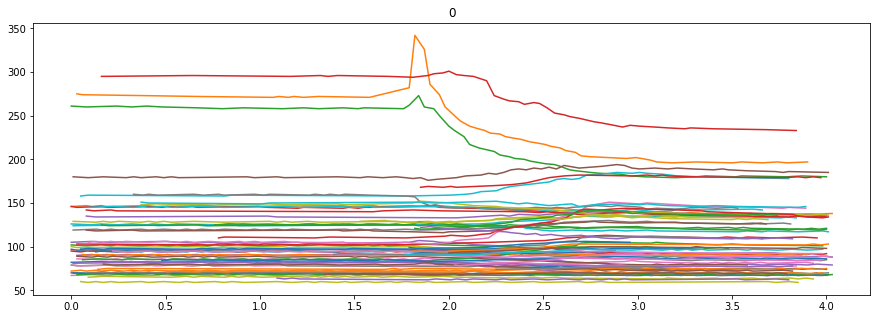

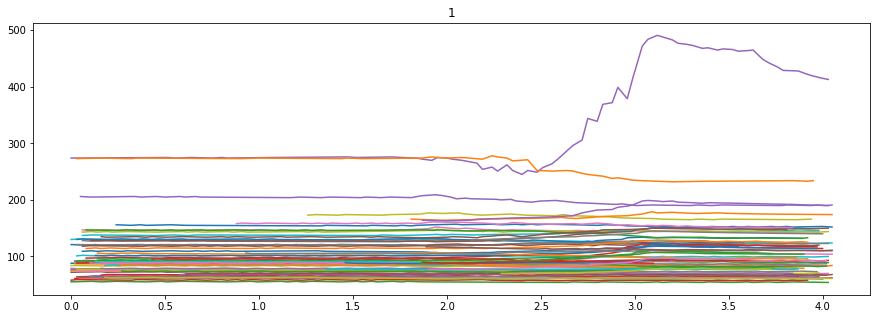

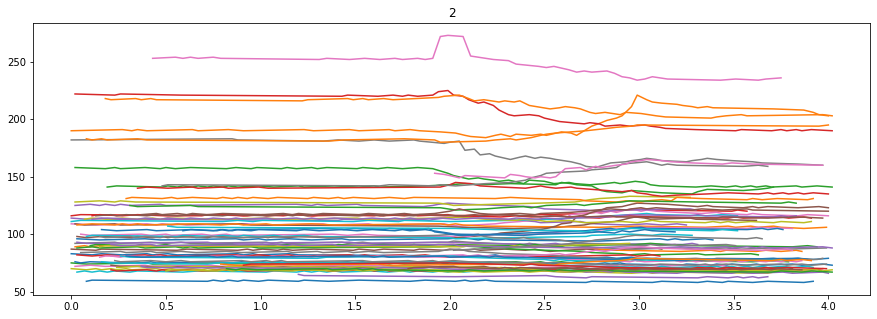

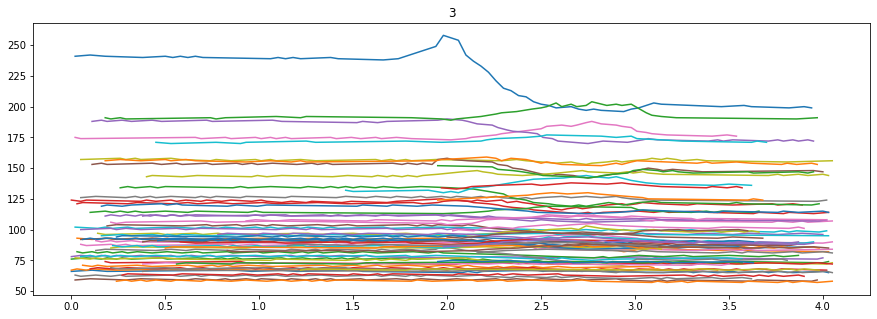

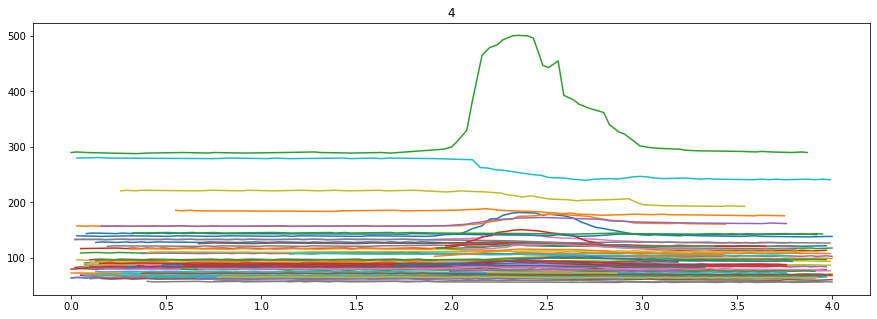

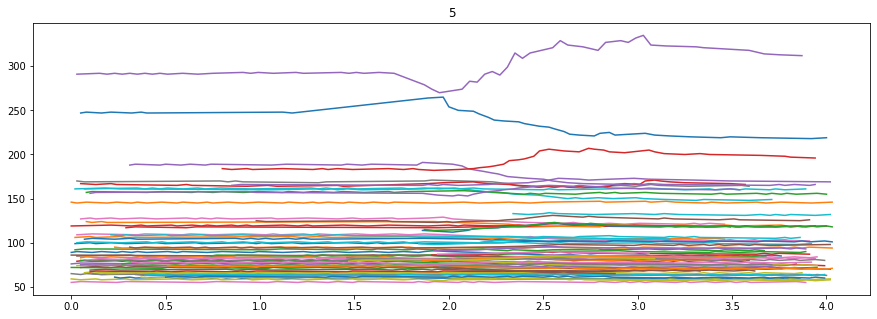

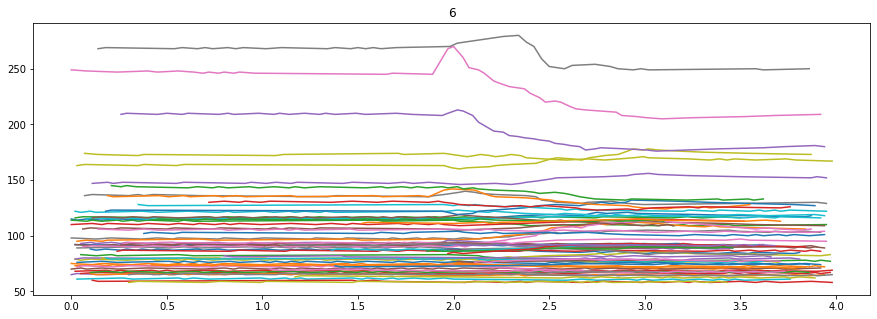

In [50]:
# see tofus
for i in range(7):
    sample = info['dragonfruit'][i]
    fig, ax = plt.subplots(figsize=(15,5))
    for taxel in sample.taxel.unique():
        ax.plot(sample[sample.taxel == taxel].t, sample[sample.taxel == taxel].adc)
        ax.set_title(str(i))
    plt.show()

In [45]:
# can I detect the water?

def isCucumber(sample, threshold_unique_taxels=15, threshold_time=3.9):
    
    a = sample[sample.t >= threshold_time]

    if len(a.taxel.unique()) >= threshold_unique_taxels:
        return 0
    
    return 1

def isDragonfruit(sample, threshold_unique_taxels=5, threshold_diff_adc=5 ):

    a = sample[['taxel', 'adc']].groupby(['taxel']).agg(['max', 'min', 'std'])
    a.columns = a.columns.map('_'.join)
    a = a.assign(diversion = a.adc_max.subtract(a.adc_min))

    
    if ( a[a.diversion >= threshold_diff_adc].shape[0] ) <= threshold_unique_taxels:
        return 1
        
    return 0

# can I detect the tofu?

def isTofu(sample, threshold_unique_taxels=6, threshold_diff_adc=15):
    
    if isDragonfruit(sample) == 1:
        return 0
    if isCucumber(sample) == 1:
        return 0

    a = sample[['taxel', 'adc']].groupby(['taxel']).agg(['max', 'min', 'std'])
    a.columns = a.columns.map('_'.join)
    a = a.assign(diversion = a.adc_max.subtract(a.adc_min))

    #print(a[a.diversion >= threshold_diff_adc].shape[0], threshold_unique_taxels)

    
    if a[a.diversion >= threshold_diff_adc].shape[0] >= threshold_unique_taxels:
        return 0
    
    return 1

# can I detect watermelon?

def integrate(sample):
    delta_times = sample.t.diff().fillna(0).values
    adc = sample.adc.values
    res = delta_times*adc
    return np.sum(res)

def isWatermelon(sample, threshold_unique_taxels=15, threshold_time=3.9):
    
    if isDragonfruit(sample) == 1:
        return 0
    
    if isTofu(sample) == 1:
        return 0
    
    a = sample[sample.t >= threshold_time]
    
    if len(a.taxel.unique()) >= threshold_unique_taxels:
        return 1
    
    return 0

In [46]:
obj = 'cucumber'
for i in range(4):
    print(f'{obj} check at {i}: {isWatermelon(info[obj][i])}, {isTofu(info[obj][i])}, {isDragonfruit(info[obj][i])}, {isCucumber(info[obj][i])}')

cucumber check at 0: 0, 0, 0, 1
cucumber check at 1: 0, 0, 0, 1
cucumber check at 2: 0, 0, 0, 1
cucumber check at 3: 0, 0, 0, 1


In [47]:
for obj in info.keys():
    for i in range(iters-1):
        if obj == 'cucumber':
            if i < 4:
                print(f'{obj} check at {i}: {isWatermelon(info[obj][i])}, {isTofu(info[obj][i])}, {isDragonfruit(info[obj][i])}, {isCucumber(info[obj][i])}')
            else:
                break
        else:
            print(f'{obj} check at {i}: {isWatermelon(info[obj][i])}, {isTofu(info[obj][i])}, {isDragonfruit(info[obj][i])}, {isCucumber(info[obj][i])}')

cucumber check at 0: 0, 0, 0, 1
cucumber check at 1: 0, 0, 0, 1
cucumber check at 2: 0, 0, 0, 1
cucumber check at 3: 0, 0, 0, 1
watermelon check at 0: 1, 0, 0, 0
watermelon check at 1: 1, 0, 0, 0
watermelon check at 2: 1, 0, 0, 0
watermelon check at 3: 1, 0, 0, 0
watermelon check at 4: 1, 0, 0, 0
watermelon check at 5: 1, 0, 0, 0
watermelon check at 6: 1, 0, 0, 0
watermelon check at 7: 1, 0, 0, 0
watermelon check at 8: 1, 0, 0, 0
watermelon check at 9: 1, 0, 0, 0
watermelon check at 10: 1, 0, 0, 0
watermelon check at 11: 1, 0, 0, 0
watermelon check at 12: 1, 0, 0, 0
watermelon check at 13: 1, 0, 0, 0
tofu check at 0: 0, 1, 0, 0
tofu check at 1: 0, 0, 1, 0
tofu check at 2: 0, 1, 0, 0
tofu check at 3: 0, 1, 0, 0
tofu check at 4: 0, 1, 0, 0
tofu check at 5: 0, 1, 0, 0
tofu check at 6: 0, 1, 0, 0
tofu check at 7: 0, 1, 0, 0
tofu check at 8: 0, 1, 0, 0
tofu check at 9: 0, 1, 0, 0
tofu check at 10: 0, 1, 0, 0
tofu check at 11: 0, 1, 0, 0
tofu check at 12: 0, 1, 0, 0
tofu check at 13: 0, 1, 0

In [ ]:
for obj in ['watermelon']:#info.keys():
    for i in range(iters):
        isWatermelon(info[obj][i])
        #print(f'{obj} check at {i}: {isWater(info[obj][i])}, {isTofu(info[obj][i])}')

In [ ]:
for obj in info.keys():
    for i in range(iters):
        print(f'{obj} check at {i}: {isWater(info[obj][i])}, {isTofu(info[obj][i])}')

In [ ]:
# sample = info['water'][7]
# fig, ax = plt.subplots(figsize=(15,10))
# for taxel in sample.taxel.unique():
#     ax.plot(sample[sample.taxel == taxel].t, sample[sample.taxel == taxel].adc)
#     ax.set_title(str(i))
# plt.show()

In [ ]:
sample = info['tofu'][7]
fig, ax = plt.subplots(figsize=(15,10))
for taxel in sample.taxel.unique():
    ax.plot(sample[sample.taxel == taxel].t, sample[sample.taxel == taxel].adc)
    ax.set_title(str(i))
plt.show()